In [16]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

training = pickle.load(open('../data/training_clean.pkl', 'rb'))
testing = pickle.load(open('../data/testing_clean.pkl', 'rb'))
validation = pickle.load(open('../data/validation_clean.pkl', 'rb'))

In [17]:
# col names
training.columns

Index(['subreddit', 'all_text', 'connection', 'lived exp', 'legality',
       'effects', 'methods of ingestion', 'combination of substances',
       'mental health', 'overdose', 'withdrawal', 'safety', 'relapse',
       'nurturant support & morality', 'other', 'quality', 'n/a',
       'Unnamed: 17', 'text'],
      dtype='object')

In [18]:
# eda
# drop last two cols of training
training = training.drop(columns=['Unnamed: 17', 'all_text', 'subreddit'])
testing = testing.drop(columns=['d'])
validation = validation.drop(columns=['d'])

In [19]:
combined = pd.concat([training, testing, validation])

In [47]:
full_test = pd.concat([testing, validation])
full_test['lived exp'].value_counts(dropna=False)

Other         53
Dependency    37
Recovery       7
NaN            3
Name: lived exp, dtype: int64

In [46]:
training['lived exp'].value_counts(dropna=False)

Other         256
Dependency    116
NaN            21
Recovery        7
Name: lived exp, dtype: int64

<AxesSubplot:>

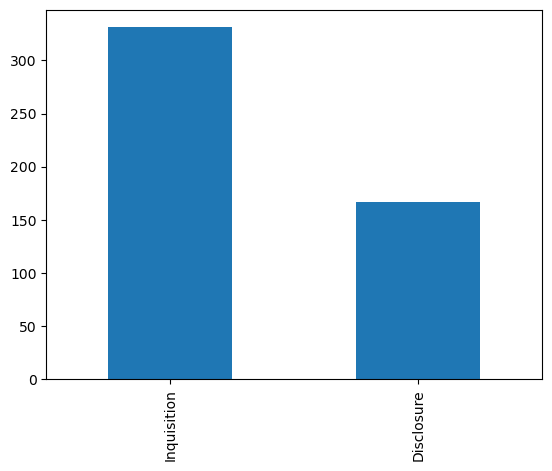

In [20]:
# EDA
# frequencies of each class
combined['connection'].value_counts().plot(kind='bar')

In [28]:
# print values of lived exp
combined['lived exp'].value_counts(dropna=False)

Other         309
Dependency    153
NaN            24
Recovery       14
Name: lived exp, dtype: int64

<AxesSubplot:>

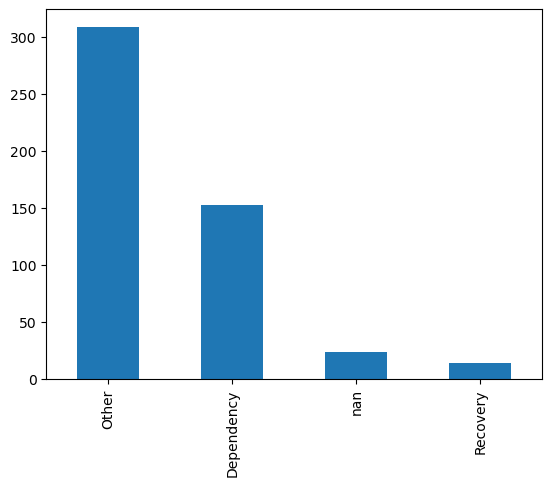

In [29]:
# lived experience including NaNs
combined['lived exp'].value_counts(dropna=False).plot(kind='bar')

In [37]:
# get frequencies of each objective
objectives = ['Quality', 'Legality', 'Effects', 'Methods of Ingestion', 'Combination of Substances', 'Mental Health',
          'N/A', 'Other', 'Overdose', 'Nurturant Support & Morality', 'Withdrawal', 'Safety', 'Relapse']
# to lower
objectives = [x.lower() for x in objectives]
freqs = {}
for obj in objectives:
    print(obj,'\n', combined[obj].value_counts()[1])
    freqs[obj] = combined[obj].value_counts()[1]




quality 
 41
legality 
 17
effects 
 248
methods of ingestion 
 265
combination of substances 
 97
mental health 
 62
n/a 
 20
other 
 125
overdose 
 9
nurturant support & morality 
 48
withdrawal 
 50
safety 
 81
relapse 
 21


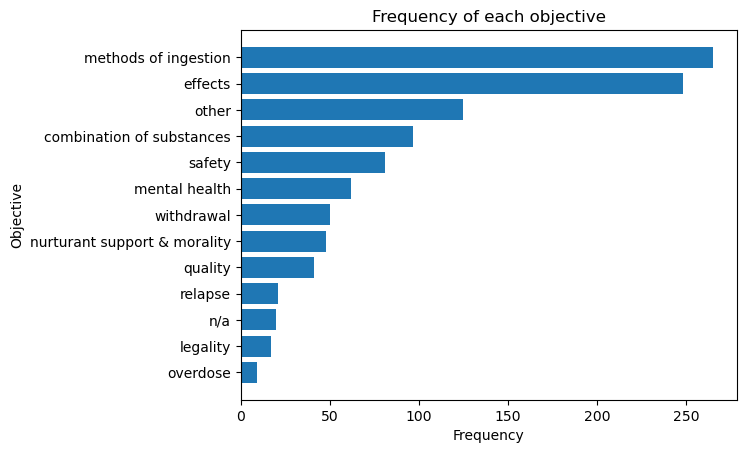

In [44]:
# vis of objectives horizontal bar
freqs = {k: v for k, v in sorted(freqs.items(), key=lambda item: item[1])}
plt.barh(list(freqs.keys()), list(freqs.values())) 
plt.xlabel('Frequency')
plt.ylabel('Objective')
plt.title('Frequency of each objective')
plt.show()